<a href="https://colab.research.google.com/github/Zamoca42/TIL/blob/main/AI/Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
(X_train, Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()
# keras에서 제공하는 데이터

print(X_train[0])
print(Y_train[0])



# 출력결과

# [[[0 0 0 ... 0 0 0]
#   [0 0 0 ... 0 0 0]
#   [0 0 0 ... 0 0 0]
#   ...
#   [0 0 0 ... 0 0 0]
#   [0 0 0 ... 0 0 0]
#   [0 0 0 ... 0 0 0]]
#   ...]

# 해당 출력은 X_train의 28*28의 그레이스케일 데이터를 생략한 값




[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

'\n출력결과\n\n[[[0 0 0 ... 0 0 0]\n  [0 0 0 ... 0 0 0]\n  [0 0 0 ... 0 0 0]\n  ...\n  [0 0 0 ... 0 0 0]\n  [0 0 0 ... 0 0 0]\n  [0 0 0 ... 0 0 0]]\n  ...]\n\n해당 출력은 X_train의 28*28데이터\n\n'

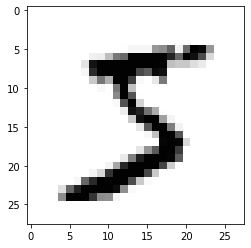

In [3]:
plt.imshow(X_train[0], cmap='Greys', interpolation='nearest')
plt.show()

In [4]:
print(X_train[0].shape)
print(Y_train[0].shape)

(28, 28)
()


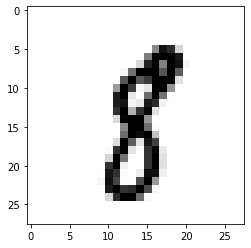

In [5]:
plt.imshow(X_train[300], cmap='Greys', interpolation='nearest')
plt.show()

# 학습을 하려면 데이터를 입력해야한다

In [7]:
# Train data 갯수
print(X_train.shape)
print(Y_train.shape)
# Test data 갯수
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [21]:
X_train = X_train.reshape(-1, 28*28) # 데이터 갯수를 정확히 모른다면 60000 자리에 -1넣으면 해결
X_test = X_test.reshape(-1, 28*28) 

model = keras.models.Sequential([
    keras.layers.Dense(units=90, activation='relu', input_shape=[28*28]),
    keras.layers.Dense(units=30, activation='sigmoid'), 
    keras.layers.Dense(units=10, activation='softmax'),
])

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # one-hot encoding

hist = model.fit(X_train, Y_train, batch_size=1000, epochs=100, shuffle=True, verbose = 0)

# 평가
score = model.evaluate(X_test,Y_test, verbose=0)
print("test loss:", score[0])
print("test accuracy:", score[1])

test loss: 0.45752984285354614
test accuracy: 0.8561000227928162


In [14]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


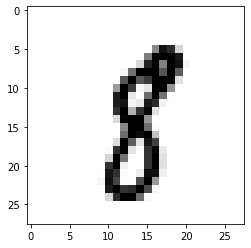

In [15]:
plt.imshow(X_train[300].reshape(28,28), cmap='Greys', interpolation='nearest')
# 위는 1D 데이터로 reshape 했기 때문에 다시 plot화 하려면 2D로 reshape해야한다
plt.show()

n: 3432
1/1 [==============================] - 0s 41ms/step
predict:  [3]


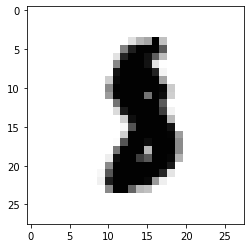

n: 3352
1/1 [==============================] - 0s 15ms/step
predict:  [2]


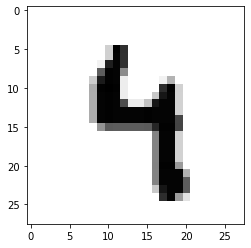

n: 7403
1/1 [==============================] - 0s 18ms/step
predict:  [5]


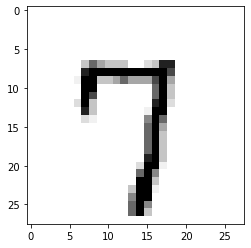

n: 2038
1/1 [==============================] - 0s 15ms/step
predict:  [2]


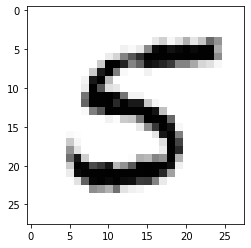

n: 9967
1/1 [==============================] - 0s 15ms/step
predict:  [8]


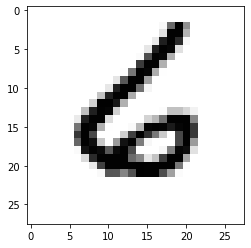

In [22]:
for i in range(5):
  n = int(np.random.rand()*10000)
  print("n:", n)
  print("predict: ", np.argmax(model.predict(X_test[n].reshape(1,-1)),axis=1))

  plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
  plt.show()